In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.float_format", lambda x : "%.4f" %x)
pd.set_option("display.width" , 200)

In [3]:
from warnings import filterwarnings
import gc
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore",category=FutureWarning)
filterwarnings("ignore")

In [4]:
%%time

path = "/Users/gokhanersoz/Desktop/GitHub/Fraud/Fraud_Data"

train = pd.read_csv(f"{path}/drop_train.csv", index_col=0)
test  = pd.read_csv(f"{path}/drop_test.csv" , index_col=0)

gc.collect()

CPU times: user 4.78 s, sys: 436 ms, total: 5.21 s
Wall time: 5.23 s


0

In [5]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D11,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,days,day_risk,hours,hours_risk,LogTransactionAmt,Risk_TransactionAmt,Risk_ProductCD,card3_feature,addr1_risk,Dist1_Risk,Dist2_Risk,OS_id_30,Version_id_30,Browser_id_31,Version_id_31,Width_id_33,Height_id_33,DeviceCorp,Trans_min_mean,Trans_min_std,TransactionAmt_to_mean_card1,TransactionAmt_to_mean_card4,TransactionAmt_to_std_card1,TransactionAmt_to_std_card4,PCA_V_1,PCA_V_2,PCA_V_3
0,2987000,0,86400,68.5000,4,13926,361.0000,150.0000,2,142.0000,1,315.0000,87.0000,4,4,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,2.0000,0.0000,1.0000,1.0000,14.0000,97.0000,13.0000,26.0000,13.0000,13.0000,0.0000,1,1,1,2,0,1,2,2,2,2,2,2,3,2,2,2,41,14,260,0,2,2,2,2,0,1555,1,0,1,0,4.2268,0,2,0,1,0,1,4,66,14,74,155,138,12,-66.4927,-0.2866,0.1946,0.2578,0.1846,0.1702,-6607.6746,-772.0429,30.5499
1,2987001,0,86401,29.0000,4,2755,404.0000,150.0000,3,102.0000,1,325.0000,87.0000,1,4,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,97.0000,8.0000,0.0000,0.0000,43.0000,0.0000,2,2,2,0,1,1,2,2,2,2,2,2,3,2,2,2,41,14,260,0,2,2,2,2,0,1555,1,0,1,0,3.3673,1,2,0,0,1,1,4,66,14,74,155,138,12,-105.9927,-0.4569,0.1238,0.2195,0.0630,0.1250,-6607.4911,-900.2382,-45.3510
2,2987002,0,86469,59.0000,4,4663,490.0000,150.0000,4,166.0000,2,330.0000,87.0000,2,4,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,97.0000,8.0000,0.0000,0.0000,315.0000,315.0000,1,1,1,0,0,0,0,0,0,2,2,2,3,2,2,2,41,14,260,0,2,2,2,2,0,1555,1,0,1,0,4.0775,0,2,0,0,0,1,4,66,14,74,155,138,12,-75.9927,-0.3276,0.6081,0.4428,0.5892,0.2585,-6607.4911,-900.2382,-45.3508
3,2987003,0,86499,50.0000,4,18132,567.0000,150.0000,3,117.0000,2,476.0000,87.0000,5,4,2.0000,5.0000,0.0000,0.0000,0.0000,4.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,25.0000,1.0000,112.0000,112.0000,0.0000,94.0000,84.0000,43.0000,111.0000,2,2,2,0,1,0,2,2,2,2,2,2,3,2,2,2,41,14,260,0,2,2,2,2,0,1555,1,0,1,0,3.9120,0,2,0,1,1,1,4,66,14,74,155,138,12,-84.9927,-0.3664,0.4051,0.3784,0.2594,0.2155,-6610.9864,1551.4786,1335.5361
4,2987004,0,86506,50.0000,1,4497,514.0000,150.0000,3,102.0000,1,420.0000,87.0000,1,4,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,1.0000,0.0000,97.0000,8.0000,26.0000,15.0000,43.0000,52.0000,2,2,2,3,2,2,2,2,2,1,1,1,3,2,1,1,7,124,164,4,1,0,1,1,2,953,1,0,1,0,3.9120,0,1,0,1,1,1,0,58,59,12,86,12,9,-84.9927,-0.3664,0.5156,0.3784,0.8829,0.2155,163758.6228,-666.6236,11.6755


In [6]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D11,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id-12,id-15,id-16,id-23,id-27,id-28,id-29,id-30,id-31,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo,days,day_risk,hours,hours_risk,LogTransactionAmt,Risk_TransactionAmt,Risk_ProductCD,card3_feature,addr1_risk,Dist1_Risk,Dist2_Risk,OS_id_30,Version_id_30,Browser_id_31,Version_id_31,Width_id_33,Height_id_33,DeviceCorp,Trans_min_mean,Trans_min_std,TransactionAmt_to_mean_card1,TransactionAmt_to_mean_card4,TransactionAmt_to_std_card1,TransactionAmt_to_std_card4,PCA_V_1,PCA_V_2,PCA_V_3
0,3663549,18403224,31.9500,4,10409,111.0000,150.0000,4,226.0000,2,170.0000,87.0000,1,4,6.0000,6.0000,0.0000,0.0000,3.0000,4.0000,0.0000,0.0000,6.0000,0.0000,5.0000,1.0000,115.0000,6.0000,419.0000,419.0000,27.0000,398.0000,418.0000,203.0000,409.0000,1,1,0,3,2,0,1,1,1,2,2,2,3,2,2,2,47,0,390,0,2,2,2,2,0,1986,7,0,1,0,3.4642,0,2,0,1,0,1,4,76,0,93,210,177,12,-102.7756,-0.4182,0.3393,0.2373,0.2604,0.1298,-6607.5614,-871.9692,-27.2619
1,3663550,18403263,49.0000,4,4272,111.0000,150.0000,4,226.0000,2,299.0000,87.0000,7,4,3.0000,2.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,2.0000,0.0000,1.0000,1.0000,12.0000,2.0000,149.0000,149.0000,7.0000,634.0000,231.0000,634.0000,634.0000,1,0,0,0,2,0,2,2,2,2,2,2,3,2,2,2,47,0,390,0,2,2,2,2,0,1986,7,0,1,0,3.8918,0,2,0,1,0,1,4,76,0,93,210,177,12,-85.7256,-0.3488,0.3335,0.3639,0.1343,0.1991,-6607.9515,-703.4290,76.4686
2,3663551,18403310,171.0000,4,4476,574.0000,150.0000,4,226.0000,2,472.0000,87.0000,2,4,2.0000,2.0000,0.0000,0.0000,0.0000,5.0000,0.0000,0.0000,4.0000,0.0000,2.0000,0.0000,22.0000,2.0000,137.0000,137.0000,10.0000,97.0000,136.0000,136.0000,97.0000,1,1,0,0,0,0,0,0,0,2,2,2,3,2,2,2,47,0,390,0,2,2,2,2,0,1986,7,0,1,0,5.1417,0,2,0,1,1,1,4,76,0,93,210,177,12,36.2744,0.1476,1.4855,1.2700,1.8958,0.6949,-6609.1210,-217.2663,405.5271
3,3663552,18403310,284.9500,4,10989,360.0000,150.0000,4,166.0000,2,205.0000,87.0000,1,4,5.0000,2.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,2.0000,0.0000,2.0000,0.0000,7.0000,4.0000,42.0000,42.0000,41.0000,242.0000,242.0000,242.0000,242.0000,1,1,1,3,2,1,2,2,2,2,2,2,3,2,2,2,47,0,390,0,2,2,2,2,0,1986,7,0,1,0,5.6523,1,2,0,1,0,1,4,76,0,93,210,177,12,150.2244,0.6112,2.9697,2.1163,1.9140,1.1579,-6607.5418,-899.4228,-42.3436
4,3663553,18403317,67.9500,4,18018,452.0000,150.0000,3,117.0000,2,264.0000,87.0000,1,4,6.0000,6.0000,0.0000,0.0000,2.0000,5.0000,0.0000,0.0000,5.0000,0.0000,6.0000,0.0000,14.0000,6.0000,22.0000,22.0000,0.0000,22.0000,22.0000,22.0000,22.0000,1,1,1,3,2,0,0,1,1,2,2,2,3,2,2,2,47,0,390,0,2,2,2,2,0,1986,7,0,1,0,4.2188,0,2,0,1,0,1,4,76,0,93,210,177,12,-66.7756,-0.2717,0.5674,0.5177,0.3102,0.2775,-6607.8473,-742.4405,50.8632


In [7]:
X = train.drop(["TransactionID","isFraud"], axis = 1) 
y = train["isFraud"]

In [8]:
train_cat_cols = pd.read_csv("/Users/gokhanersoz/Desktop/GitHub/Fraud/Fraud_Data/train_cats.csv",
                            index_col=0)
test_cat_cols = pd.read_csv("/Users/gokhanersoz/Desktop/GitHub/Fraud/Fraud_Data/test_cats.csv",
                            index_col=0)

In [9]:
train_cat_cols.shape,test_cat_cols.shape

((46, 1), (46, 1))

In [10]:
(train_cat_cols.replace("_","",regex = True) == test_cat_cols.replace("-","",regex = True).\
                                                replace("_","",regex = True)).sum().values[0]

46

In [11]:
train_cat_cols = train_cat_cols.get("0").values.tolist()
test_cat_cols = test_cat_cols.get("0").values.tolist()

In [12]:
train_num_cols = [col for col in X.columns if col not in train_cat_cols]
train_num_cols[:20]

['TransactionDT',
 'TransactionAmt',
 'card1',
 'card2',
 'card3',
 'card5',
 'addr1',
 'addr2',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12']

In [13]:
# Test Uygulamadık !!!!

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_Scaled = sc.fit_transform(X[train_num_cols])

In [14]:
X_Scaled = pd.DataFrame(data = X_Scaled, columns = train_num_cols)
X_Scaled = pd.concat([ X_Scaled, X[train_cat_cols] ], axis = 1)
X_Scaled.head()

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D11,D15,days,hours,LogTransactionAmt,Trans_min_mean,Trans_min_std,TransactionAmt_to_mean_card1,TransactionAmt_to_mean_card4,TransactionAmt_to_std_card1,TransactionAmt_to_std_card4,PCA_V_1,PCA_V_2,PCA_V_3,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,day_risk,hours_risk,Risk_TransactionAmt,Risk_ProductCD,card3_feature,addr1_risk,Dist1_Risk,Dist2_Risk,OS_id_30,Version_id_30,Browser_id_31,Version_id_31,Width_id_33,Height_id_33,DeviceCorp
0,-1.5796,-0.2866,0.8218,-0.0096,-0.2802,-1.3971,0.2433,0.0699,-0.1394,-0.1237,-0.0375,-0.0593,-0.2162,-0.1388,-0.0432,-0.0580,-0.2089,-0.0564,-0.1093,-0.0460,-0.2719,-0.1772,-0.5090,-0.2854,-0.1322,-0.4804,-0.5565,-0.5851,-0.7692,-1.4546,-1.8224,-0.1443,-0.2866,-0.2866,-0.5959,-0.4322,-0.2126,-0.4156,-0.1190,-0.0529,0.0123,4,2,1,4,4,1,1,1,2,0,1,2,2,2,2,2,2,3,2,2,2,41,14,260,0,2,2,2,2,0,1555,0,0,0,2,0,1,0,1,4,66,14,74,155,138,12
1,-1.5796,-0.4569,-1.4575,0.2650,-0.2802,-2.3692,0.3475,0.0699,-0.1394,-0.1237,-0.0375,-0.0593,-0.2162,-0.1388,-0.0432,-0.0580,-0.2688,-0.0564,-0.1275,-0.0460,-0.2719,-0.1772,-0.5978,-0.2854,-0.2374,-0.6338,-0.6310,-0.3778,-0.7692,-1.4546,-1.8224,-1.0454,-0.4569,-0.4569,-0.6484,-0.4545,-0.2463,-0.4608,-0.1190,-0.0617,-0.0182,4,3,1,1,4,2,2,2,0,1,1,2,2,2,2,2,2,3,2,2,2,41,14,260,0,2,2,2,2,0,1555,0,0,1,2,0,0,1,1,4,66,14,74,155,138,12
2,-1.5796,-0.3276,-1.0682,0.8142,-0.2802,-0.8139,0.3995,0.0699,-0.1394,-0.1237,-0.0375,-0.0593,-0.2162,-0.1388,-0.0432,-0.0580,-0.2089,-0.0564,-0.1275,-0.0460,-0.2719,-0.1772,-0.5978,-0.2854,-0.2374,-0.6338,-0.6310,1.5021,0.8793,-1.4546,-1.8224,-0.3008,-0.3276,-0.3276,-0.2900,-0.3242,-0.1003,-0.3274,-0.1190,-0.0617,-0.0182,4,4,2,2,4,1,1,1,0,0,0,0,0,0,2,2,2,3,2,2,2,41,14,260,0,2,2,2,2,0,1555,0,0,0,2,0,0,0,1,4,66,14,74,155,138,12
3,-1.5796,-0.3664,1.6800,1.3059,-0.2802,-2.0047,1.9205,0.0699,-0.1252,-0.0767,-0.0375,-0.0593,-0.2162,-0.0748,-0.0432,-0.0580,-0.2089,-0.0564,-0.1275,-0.0460,-0.0506,-0.1772,0.1129,-0.1730,-0.4056,-0.0793,-0.1493,-0.3778,-0.1883,-1.4546,-1.8224,-0.4744,-0.3664,-0.3664,-0.4402,-0.3618,-0.1918,-0.3703,-0.1191,0.1063,0.5369,4,3,2,5,4,2,2,2,0,1,0,2,2,2,2,2,2,3,2,2,2,41,14,260,0,2,2,2,2,0,1555,0,0,0,2,0,1,1,1,4,66,14,74,155,138,12
4,-1.5796,-0.3664,-1.1021,0.9675,-0.2802,-2.3692,1.3371,0.0699,-0.1394,-0.1237,-0.0375,-0.0593,-0.2162,-0.1388,-0.0432,-0.0367,-0.2688,-0.0369,-0.1275,-0.0460,-0.2719,-0.1772,-0.5978,-0.2854,-0.2374,-0.4804,-0.5450,-0.3778,-0.4971,-1.4546,-1.8224,-0.4744,-0.3664,-0.3664,-0.3584,-0.3618,-0.0189,-0.3703,2.9490,-0.0457,0.0047,1,3,1,1,4,2,2,2,3,2,2,2,2,2,1,1,1,3,2,1,1,7,124,164,4,1,0,1,1,2,953,0,0,0,1,0,1,1,1,0,58,59,12,86,12,9


In [15]:
print("X_Scaled Shape : {}".format(X_Scaled.shape))
print("X Shape : {}".format(X.shape))

X_Scaled Shape : (590021, 87)
X Shape : (590021, 87)


# Model

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import roc_auc_score,roc_curve,f1_score,precision_score,accuracy_score,recall_score,\
                            confusion_matrix, classification_report

from sklearn.model_selection import train_test_split,cross_validate,validation_curve
from sklearn.model_selection import GridSearchCV,KFold,StratifiedKFold

In [17]:
######################################################
# Automated Hyperparameter Optimization
######################################################


xgboost_params = {
                   "learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20],
                  "n_estimators": [100, 200],
                  "colsample_bytree": [0.5, 0.8, 1]}



rf_params = {"max_depth": [ 8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [8, 15, 20],
             "n_estimators": [ 500, 1000]
            }

gbm_params = {"learning_rate": [0.01, 0.1],
              "max_depth": [3, 8],
              "n_estimators": [500, 1000],
              "subsample": [1, 0.5, 0.7]}

#"criterion" : ["gini","entropy"],
#"splitter" : ["best","random"],
cart_params = {
                'max_depth': np.arange(1,20,5,dtype = int),
                "min_samples_split": np.arange(2,30,5,dtype = int)}



# "C" : [100, 10, 1.0, 0.1, 0.01],
#"penalty" : ['l1', 'l2', 'elasticnet', 'none'],
#"solver" : ['newton-cg', 'lbfgs', 'liblinear'],

lr_params = {
             "C" : [1.0, 0.1, 0.01],
             "max_iter" : np.linspace(100,300,3,dtype = int)
             }


lightgbm_params = {
                    "learning_rate" : [0.1, 0.2],
                    #"max_depth" : [5,8,12],
                    "n_estimators" : [100,200,300],
                    "colsample_bytree" : [0.5, 1]
                  }

classifiers = [ 
                      
                       ("RF", RandomForestClassifier(), rf_params),
                       ("CART", DecisionTreeClassifier() , cart_params),    
                       ("LR" , LogisticRegression() , lr_params),
                       ("GBM" , GradientBoostingClassifier() , gbm_params),
                       ("XGBoost" , XGBClassifier(), xgboost_params),
                       ("LightGBM", LGBMClassifier() , lightgbm_params),
]

In [18]:
def base_advanced_model(classifiers, X , y , cv =5 ):
    
    base_data = pd.DataFrame()
    base_dict = {}
    base_index = 0
    
    
    for name, classifier, params in classifiers:
        
        cv_results = cross_validate(estimator = classifier,
                                    X = X,
                                    y = y,
                                    cv = cv,
                                    n_jobs=-1, 
                                    verbose = 0 ,
                                    scoring = ["roc_auc","accuracy"])
    
    
        base_roc_auc = cv_results["test_roc_auc"].mean()
        base_accuracy = cv_results["test_accuracy"].mean()
        base_fit_time = cv_results["fit_time"].mean()
        base_score_time = cv_results["score_time"].mean()
        
        base_data.loc[base_index, "NAME"] = name
        base_data.loc[base_index, "ROC_AUC_SCORE"] = base_roc_auc
        base_data.loc[base_index, "ACCURACY_SCORE"] = base_accuracy
        base_data.loc[base_index, "FIT_TIME"] = base_fit_time
        base_data.loc[base_index, "SCORE_TIME"] = base_score_time
        
        base_dict[name] = classifier
        
        base_index+=1
        
    base_data = base_data.set_index("NAME")
    base_data = base_data.sort_values(by = "ROC_AUC_SCORE",ascending = False)
    
    return base_data, base_dict

In [19]:
classifiers = [ 
                 #("RF", RandomForestClassifier(), rf_params),
                 ("CART", DecisionTreeClassifier() , cart_params),    
                 ("LR" , LogisticRegression() , lr_params),
                 #("GBM" , GradientBoostingClassifier() , gbm_params),
                 #("XGBoost" , XGBClassifier(), xgboost_params),
                 ("LightGBM", LGBMClassifier() , lightgbm_params),
    
]

In [20]:
basic_data , basic_dict = base_advanced_model(classifiers, X_Scaled, y, cv = 2)

In [21]:
basic_data

,ROC_AUC_SCORE,ACCURACY_SCORE,FIT_TIME,SCORE_TIME
NAME,,,,
LightGBM,0.8157,0.5410,5.4146,3.5909
LR,0.7393,0.9643,2.7079,0.3072
CART,0.5501,0.4913,12.3565,0.2717


In [22]:
basic_dict

{'CART': DecisionTreeClassifier(),
 'LR': LogisticRegression(),
 'LightGBM': LGBMClassifier()}

In [23]:
def advanced_hyperoptimization_model(classifiers, X, y, cv = 3):
    
    advanced_base = pd.DataFrame()
    advanced_index = 0
    advanced_dict = {}
    
    
    for name, classifier, params in classifiers:
        
        cv_results = cross_validate(estimator=classifier,
                                    X = X,
                                    y = y,
                                    cv = cv,
                                    n_jobs= -1, 
                                    verbose=0,
                                    scoring = ["roc_auc","accuracy"])
        
        base_roc_auc = cv_results["test_roc_auc"].mean()
        base_accuracy = cv_results["test_accuracy"].mean()
        
        base_roc_auc = round(base_roc_auc, 4)
        base_accuracy = round(base_accuracy, 4)
        
        print(f" {type(classifier).__name__.upper()} ".center(50,"#"),end = "\n\n")
        
        print("Before GridSearchCV Scores",end ="\n\n")
        print("Roc Auc Score : {}\nAccuracy Score : {}".format(base_roc_auc,base_accuracy))
        
        best_grid = GridSearchCV(estimator = classifier,
                                 param_grid= params,
                                 n_jobs=-1,
                                 verbose=0,
                                 cv=cv,
                                 scoring="roc_auc").fit(X,y)
        
        print(f"Best Params : {best_grid.best_params_}",end = "\n\n")
        
        final_classifier = classifier.set_params(**best_grid.best_params_)
        
        final_cv_results = cross_validate(estimator=final_classifier,
                                        X = X,
                                        y = y,
                                        cv = cv,
                                        n_jobs= -1, 
                                        verbose=0,
                                        scoring = ["roc_auc","accuracy"])
        
        advanced_roc_auc  = final_cv_results["test_roc_auc"].mean()
        advanced_accuracy = final_cv_results["test_accuracy"].mean()
        
        advanced_accuracy = round(advanced_accuracy,4)
        advanced_roc_auc = round(advanced_roc_auc,4)
        
        advanced_fit_time = round(final_cv_results["fit_time"].mean(), 4)
        
        print("After GridSearchCV Scores",end ="\n\n")
        print("Roc Auc Score : {}\nAccuracy Score : {}".format(advanced_roc_auc,advanced_accuracy)
              ,end ="\n\n")
        
        
        advanced_base.loc[advanced_index, "NAME"] = name
        advanced_base.loc[advanced_index, "BEFORE_ROC_AUC_SCORE"] = base_roc_auc
        advanced_base.loc[advanced_index, "BEFORE_ACCURACY_SCORE"] = base_accuracy
        advanced_base.loc[advanced_index, "AFTER_ROC_AUC_SCORE"] = advanced_roc_auc
        advanced_base.loc[advanced_index, "AFTER_ACCURACY_SCORE"] = advanced_accuracy
        advanced_base.loc[advanced_index, "AFTER_FIT_TIME"] = advanced_fit_time
            
        advanced_dict[name] = final_classifier
        
        advanced_index+=1
    
    
    advanced_base = advanced_base.set_index("NAME")
    advanced_base = advanced_base.sort_values(by = "AFTER_ROC_AUC_SCORE", ascending = False)
    
    return advanced_base, advanced_dict

In [24]:
cart_params = {
                'max_depth': np.arange(5,20,5,dtype = int),
                "min_samples_split": np.arange(5,20,5,dtype = int)}

lr_params = {
             "C" : [1.0, 0.1, 0.01],
             "max_iter" : np.linspace(100,300,3,dtype = int)
             }


lightgbm_params = {
                    "learning_rate" : [0.1, 0.2],
                    #"max_depth" : [5,8,12],
                    "n_estimators" : [100,200,300],
                    "colsample_bytree" : [0.5, 1]
                  }

classifiers = [ 
                 #("RF", RandomForestClassifier(), rf_params),
                 ("CART", DecisionTreeClassifier() , cart_params),    
                 ("LR" , LogisticRegression() , lr_params),
                 #("GBM" , GradientBoostingClassifier() , gbm_params),
                 #("XGBoost" , XGBClassifier(), xgboost_params),
                 ("LightGBM", LGBMClassifier() , lightgbm_params),
    
]

In [25]:
advanced_data, advanced_dict = advanced_hyperoptimization_model(classifiers,X_Scaled, y, cv = 2)

############# DECISIONTREECLASSIFIER #############

Before GridSearchCV Scores

Roc Auc Score : 0.5643
Accuracy Score : 0.4922
Best Params : {'max_depth': 10, 'min_samples_split': 15}

After GridSearchCV Scores

Roc Auc Score : 0.6122
Accuracy Score : 0.502

############### LOGISTICREGRESSION ###############

Before GridSearchCV Scores

Roc Auc Score : 0.7393
Accuracy Score : 0.9643
Best Params : {'C': 1.0, 'max_iter': 300}

After GridSearchCV Scores

Roc Auc Score : 0.7786
Accuracy Score : 0.9642

################# LGBMCLASSIFIER #################

Before GridSearchCV Scores

Roc Auc Score : 0.8157
Accuracy Score : 0.541
Best Params : {'colsample_bytree': 1, 'learning_rate': 0.2, 'n_estimators': 200}

After GridSearchCV Scores

Roc Auc Score : 0.8284
Accuracy Score : 0.6018



In [26]:
advanced_data

,BEFORE_ROC_AUC_SCORE,BEFORE_ACCURACY_SCORE,AFTER_ROC_AUC_SCORE,AFTER_ACCURACY_SCORE,AFTER_FIT_TIME
NAME,,,,,
LightGBM,0.8157,0.5410,0.8284,0.6018,6.8435
LR,0.7393,0.9643,0.7786,0.9642,8.1281
CART,0.5643,0.4922,0.6122,0.5020,4.9841


In [27]:
advanced_dict

{'CART': DecisionTreeClassifier(max_depth=10, min_samples_split=15),
 'LR': LogisticRegression(max_iter=300),
 'LightGBM': LGBMClassifier(colsample_bytree=1, learning_rate=0.2, n_estimators=200)}

In [28]:
import pickle
path_model = "/Users/gokhanersoz/Desktop/GitHub/Fraud/Model"

for name in advanced_dict:
    advanced_dict[name].fit(X_Scaled, y)
    pd.to_pickle(advanced_dict[name], open(f"{path_model}/{name.upper()}.pkl","wb"))

In [29]:
Lightgbm_proba = advanced_dict["LightGBM"].predict_proba(X_Scaled)[:,1]
LR_proba = advanced_dict["LR"].predict_proba(X_Scaled)[:,1]
Cart_proba = advanced_dict["CART"].predict_proba(X_Scaled)[:,1]

In [30]:
lgbm_roc = roc_auc_score(y, Lightgbm_proba)
lr_roc = roc_auc_score(y, LR_proba)
cart_roc = roc_auc_score(y, Cart_proba)

lgbm_accuracy = accuracy_score(y , advanced_dict["LightGBM"].predict(X_Scaled))
lr_accuracy = accuracy_score(y , advanced_dict["LR"].predict(X_Scaled))
cart_accuracy = accuracy_score(y , advanced_dict["CART"].predict(X_Scaled))


lgbm_fpr, lgbm_tpr, lgbm_threshold = roc_curve(y, Lightgbm_proba)
lr_fpr, lr_tpr, lr_threshold = roc_curve(y, LR_proba)
cart_fpr, cart_tpr, cart_threshold = roc_curve(y, Cart_proba)

print("Train LightGBM Roc Auc Score : {}".format(round(lgbm_roc,4)))
print("Train LightGBM Accuracy Score : {}".format(round(lgbm_accuracy,4)),end = "\n\n")

print("Train LR Roc Auc Score : {}".format(round(lr_roc,4)))
print("Train LR Accuracy Score : {}".format(round(lr_accuracy,4)),end = "\n\n")

print("Train CART Roc Auc Score : {}".format(round(cart_roc,4)))
print("Train CART Accuracy Score : {}".format(round(cart_accuracy,4)),end = "\n\n")

Train LightGBM Roc Auc Score : 0.9545
Train LightGBM Accuracy Score : 0.9806

Train LR Roc Auc Score : 0.7927
Train LR Accuracy Score : 0.9652

Train CART Roc Auc Score : 0.8641
Train CART Accuracy Score : 0.9762



##  VotingClassifiers

In [31]:
from sklearn.ensemble import VotingClassifier

In [32]:
models = [ (col,advanced_dict[col]) for col in advanced_dict] 

voting_classifier = VotingClassifier(estimators= models, voting = "soft", n_jobs=-1).fit(X_Scaled,y)

voting_proba = voting_classifier.predict_proba(X_Scaled)[:,1]
voting_roc = roc_auc_score(y, voting_proba)

voting_fpr, voting_tpr, voting_thresholds = roc_curve(y, voting_proba)

In [33]:
def voting_classifiers(estimators,X,y,cv = 2):
    
    voting_data = pd.DataFrame()
    voting_index = 0
    voting_dict = {}
    
    voting_classifier = VotingClassifier(estimators=estimators,
                                         voting="soft",
                                         n_jobs=-1).fit(X,y)
    
    cv_results = cross_validate(estimator = voting_classifier,
                                    X = X,
                                    y = y,
                                    cv = cv,
                                    n_jobs=-1, 
                                    verbose = 0 ,
                                    scoring = ["roc_auc","accuracy"])
    
    
    voting_roc_auc = cv_results["test_roc_auc"].mean()
    voting_accuracy = cv_results["test_accuracy"].mean()
    voting_fit_time = cv_results["fit_time"].mean()
    voting_score_time = cv_results["score_time"].mean()
        
    voting_data.loc[voting_index, "NAME"] = type(voting_classifier).__name__
    voting_data.loc[voting_index, "ROC_AUC_SCORE"] = round(voting_roc_auc, 4)
    voting_data.loc[voting_index, "ACCURACY_SCORE"] = round(voting_accuracy, 4)
    voting_data.loc[voting_index, "FIT_TIME"] = round(voting_fit_time, 4)
    voting_data.loc[voting_index, "SCORE_TIME"] = round(voting_score_time, 4)
        
    voting_dict[name] = voting_classifier
        
    voting_data = voting_data.set_index("NAME").sort_values("ROC_AUC_SCORE")
    
    return voting_data, voting_dict

In [34]:
voting_base , voting_dict = voting_classifiers(models, X_Scaled, y, cv = 2)

In [35]:
voting_base

,ROC_AUC_SCORE,ACCURACY_SCORE,FIT_TIME,SCORE_TIME
NAME,,,,
VotingClassifier,0.8069,0.6024,10.4661,5.9488


In [36]:
pd.concat([basic_data,voting_base],axis = 0)

,ROC_AUC_SCORE,ACCURACY_SCORE,FIT_TIME,SCORE_TIME
NAME,,,,
LightGBM,0.8157,0.5410,5.4146,3.5909
LR,0.7393,0.9643,2.7079,0.3072
CART,0.5501,0.4913,12.3565,0.2717
VotingClassifier,0.8069,0.6024,10.4661,5.9488


In [37]:
print("Train LightGBM Roc Auc Score : {}".format(round(lgbm_roc,4)),end = "\n\n")
print("Train LR Roc Auc Score : {}".format(round(lr_roc,4)),end = "\n\n")
print("Train CART Roc Auc Score : {}".format(round(cart_roc,4)),end = "\n\n")
print("Train Voting Roc Auc Score : {}".format(round(voting_roc,4)),end = "\n\n")

Train LightGBM Roc Auc Score : 0.9545

Train LR Roc Auc Score : 0.7927

Train CART Roc Auc Score : 0.8641

Train Voting Roc Auc Score : 0.9401



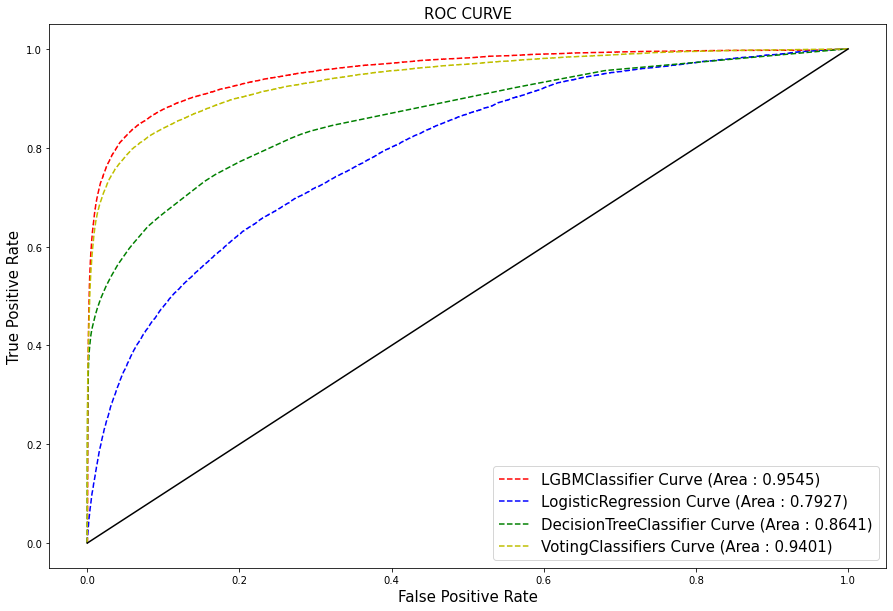

In [38]:
plt.figure(figsize = (15,10))

plt.plot(lgbm_fpr, lgbm_tpr, "r--" , \
         label = f"{type(advanced_dict['LightGBM']).__name__} Curve (Area : {round(lgbm_roc,4)})" )

plt.plot(lr_fpr, lr_tpr, "b--", 
         label = f"{type(advanced_dict['LR']).__name__} Curve (Area : {round(lr_roc,4)})" )

plt.plot(cart_fpr, cart_tpr, "g--", 
         label = f"{type(advanced_dict['CART']).__name__} Curve (Area : {round(cart_roc,4)})" )

plt.plot(voting_fpr, voting_tpr, "y--", 
         label = f"VotingClassifiers Curve (Area : {round(voting_roc,4)})" )

plt.plot([0,1],[0,1],"black")


size = 15
plt.legend( loc  = "best",fontsize = size)
plt.xlabel("False Positive Rate" ,fontsize = size)
plt.ylabel("True Positive Rate", fontsize = size)
plt.title("ROC CURVE", fontsize = size)

plt.show()

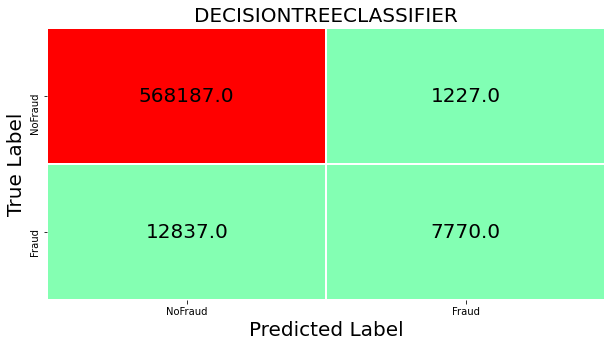

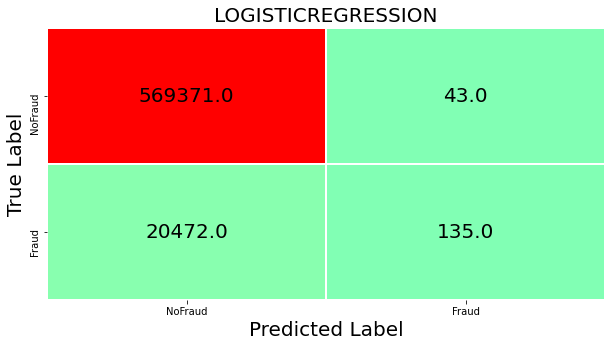

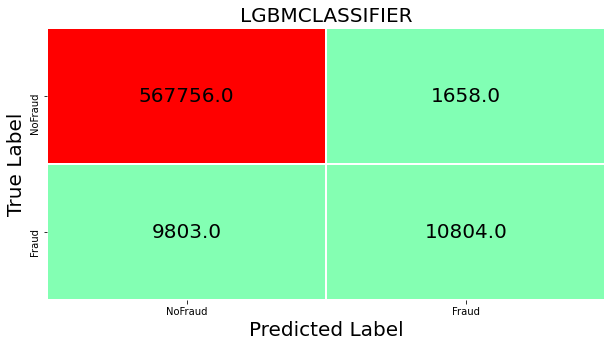

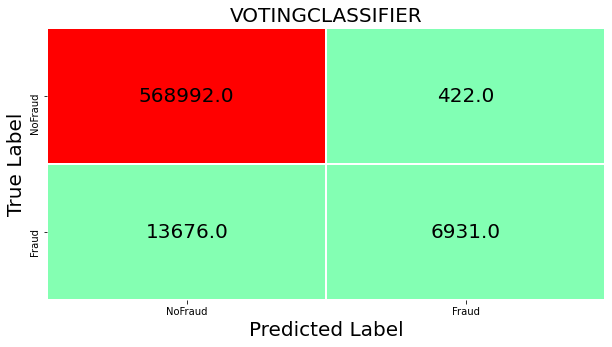

In [39]:
for name in advanced_dict:
    
    size=20
    cm = confusion_matrix(y, advanced_dict[name].predict(X_Scaled))
    
    name = type(advanced_dict[name]).__name__.upper()
    
    plt.figure(figsize = (10,5))
    sns.heatmap(data = cm ,
                annot=True,
                annot_kws={"size" : 20,"color" : "black"},
                fmt=".1f",
                cmap = "rainbow",
                cbar =False,
                xticklabels=["NoFraud","Fraud"],
                yticklabels=["NoFraud","Fraud"],
                linewidths=0.5,
                center = 0);
    
    
    plt.title(name, fontsize = size)
    plt.xlabel("Predicted Label", fontsize = size)
    plt.ylabel("True Label", fontsize = size)
    plt.show()


size=20
cm = confusion_matrix(y, voting_classifier.predict(X_Scaled))
    
name = type(voting_classifier).__name__.upper()
    
plt.figure(figsize = (10,5))
sns.heatmap(data = cm ,
            annot=True,
            annot_kws={"size" : 20,"color" : "black"},
            fmt=".1f",
            cmap = "rainbow",
            cbar =False,
            xticklabels=["NoFraud","Fraud"],
            yticklabels=["NoFraud","Fraud"],
            linewidths=0.5,
            center = 0);
    
    
plt.title(name, fontsize = size)
plt.xlabel("Predicted Label", fontsize = size)
plt.ylabel("True Label", fontsize = size)
plt.show()

In [40]:
def feature_importance(model, X , nums = 20, save = False):
    
    imp_feature = pd.DataFrame()
    imp_feature["Values"] = model.feature_importances_
    imp_feature["Name"] = [col for col in X.columns]
    imp_feature = imp_feature.sort_values(by = "Values", ascending = False)    
        
    size = 15
    plt.figure(figsize = (15,10))
    sns.barplot(x = "Values", y ="Name", data = imp_feature[:nums]
                ,palette = "viridis")
    plt.xlabel("Values",fontsize = size)
    plt.ylabel("NAME", fontsize = size)
    plt.title(f"For {type(model).__name__.upper()} Feature Importance",
             fontsize = size)
    plt.show()
    
    if save:
        
        plt.savefig(type(model).__name__ + "_importance.png")

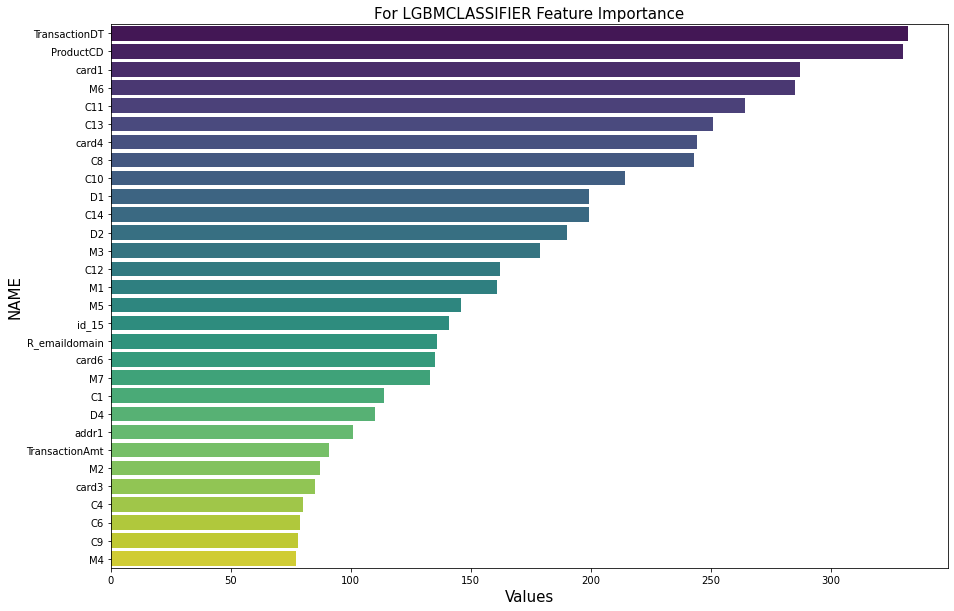

In [41]:
feature_importance(advanced_dict["LightGBM"], X , nums = 30)

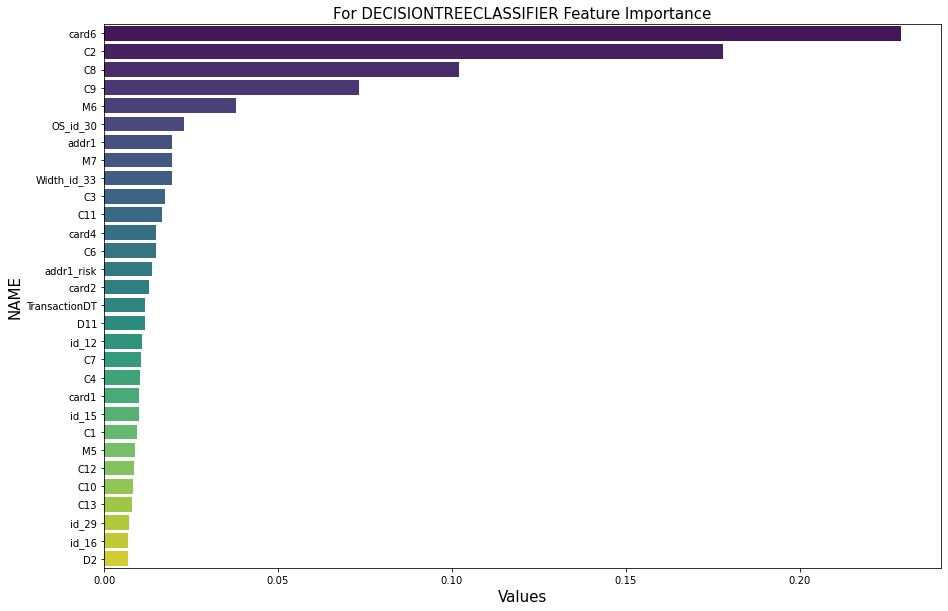

<Figure size 432x288 with 0 Axes>

In [42]:
feature_importance(advanced_dict["CART"], X , nums = 30, save = True)

In [43]:
def feature_importance_coef(model, X , nums = 20, save = False):
    
    imp_feature = pd.DataFrame()
    imp_feature["Values"] = model.coef_[0]
    imp_feature["Name"] = [col for col in X.columns]
    imp_feature = imp_feature.sort_values(by = "Values", ascending = False)    
        
    size = 15
    plt.figure(figsize = (15,10))
    sns.barplot(x = "Values", y ="Name", data = imp_feature[:nums]
                ,palette = "viridis")
    plt.xlabel("Values",fontsize = size)
    plt.ylabel("NAME", fontsize = size)
    plt.title(f"For {type(model).__name__.upper()} Feature Importance",
             fontsize = size)
    plt.show()
    
    if save:
        
        plt.savefig(type(model).__name__ + "_importance.png")

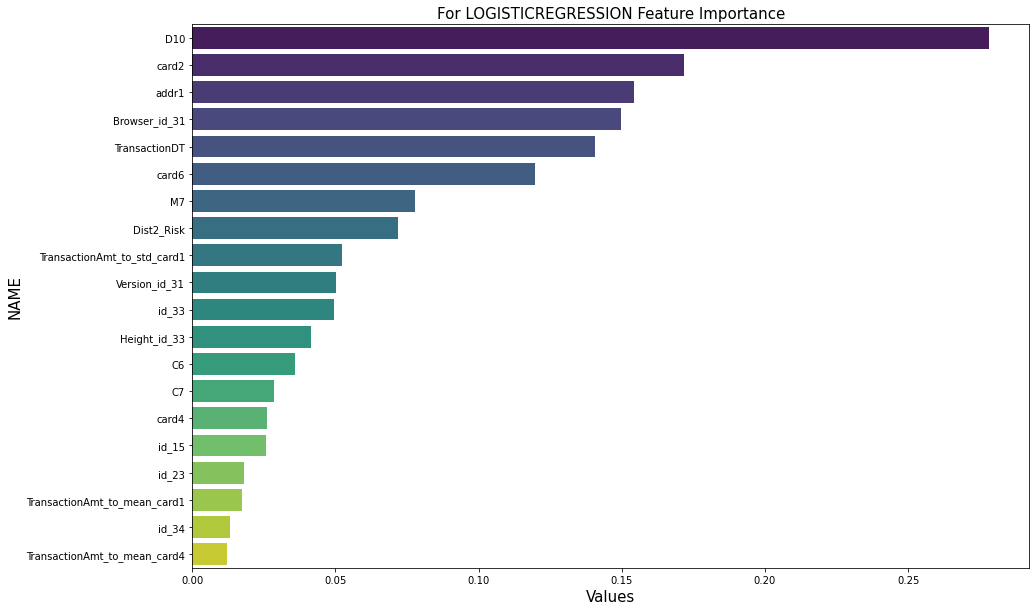

In [44]:
feature_importance_coef(advanced_dict["LR"], X, nums = 20)

# Analyzing Model Complexity with Learning Curves

In [45]:
from sklearn.model_selection import validation_curve

In [46]:
lightgbm_params

{'learning_rate': [0.1, 0.2],
 'n_estimators': [100, 200, 300],
 'colsample_bytree': [0.5, 1]}

In [47]:
def Validation_Curve(model,X,y,param_name,param_range,cv = 2, scoring = "roc_auc"):
    
    train_scores, test_scores = validation_curve(estimator=model,
                                                 X = X,
                                                 y = y,
                                                 cv = cv,
                                                 n_jobs=-1,
                                                 verbose=0,
                                                 param_name = param_name,
                                                 param_range = param_range,
                                                 scoring = scoring)
    
    
    train_mean_scores = np.mean(train_scores,axis = 1)
    test_mean_scores = np.mean(test_scores, axis = 1)
    
    
    plt.figure(figsize = (15,8))
    size = 15
    
    plt.plot(param_range, train_mean_scores,
             label = "Training Scores")
    
    plt.plot(param_range, test_mean_scores,
             label = "Validation Scores")
    
    plt.legend(loc = "best" , fontsize = size)
    plt.xlabel(f"Param Range : {param_range}\nParam Name : {param_name}",
               fontsize = size)
    plt.ylabel(f"{scoring}", fontsize = size)
    plt.title(f"{type(model).__name__.upper()} İçin Validation Curve", 
              fontsize = size)
    
    plt.show()

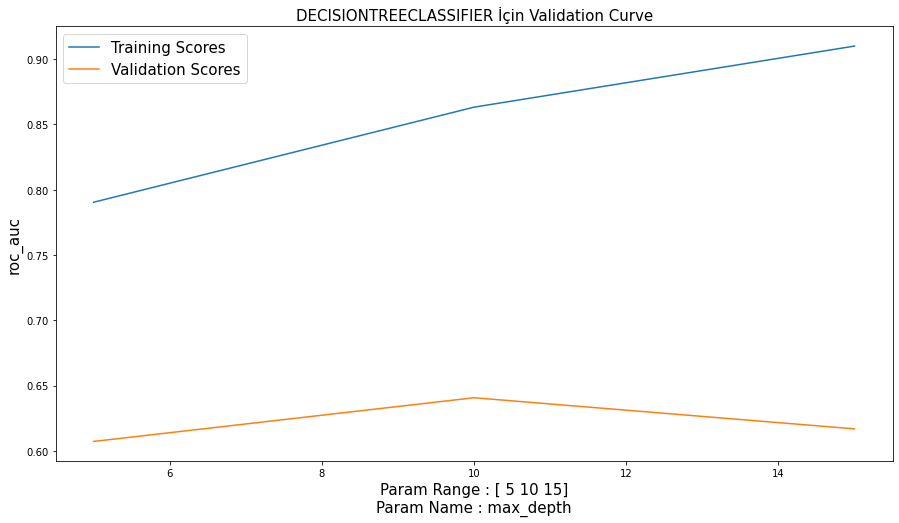

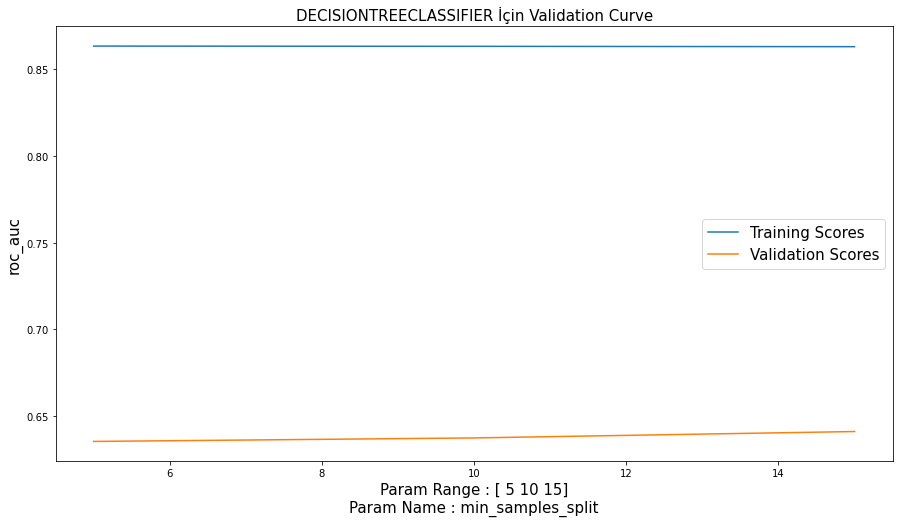

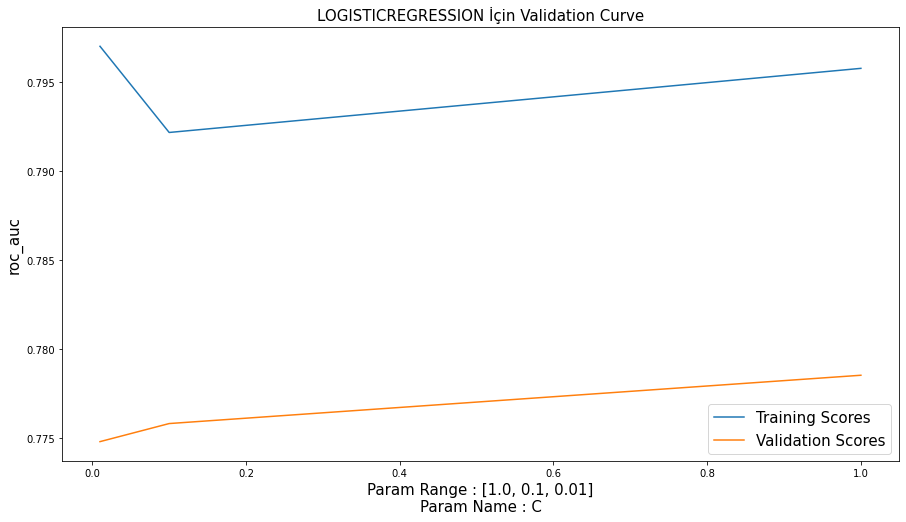

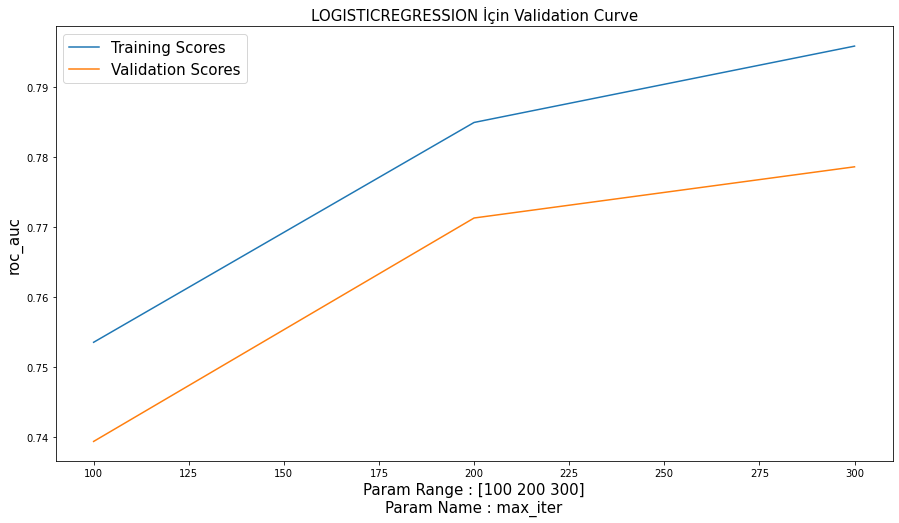

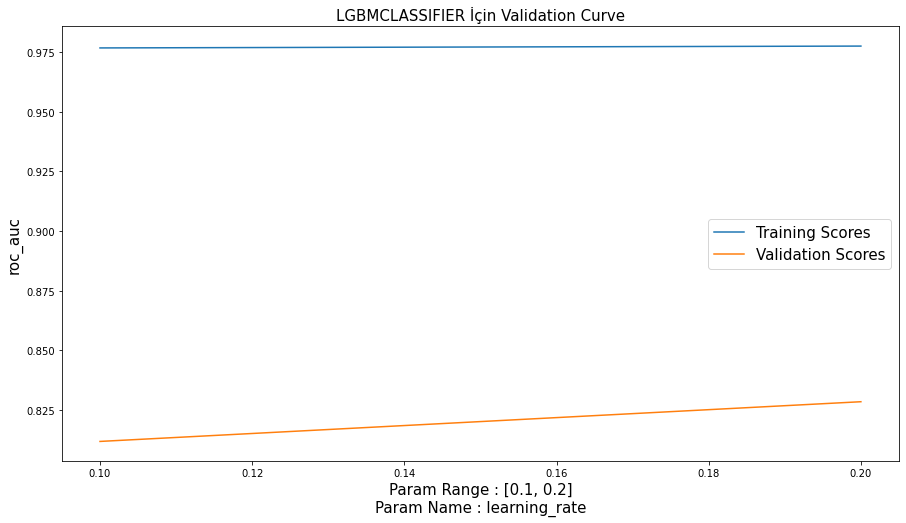

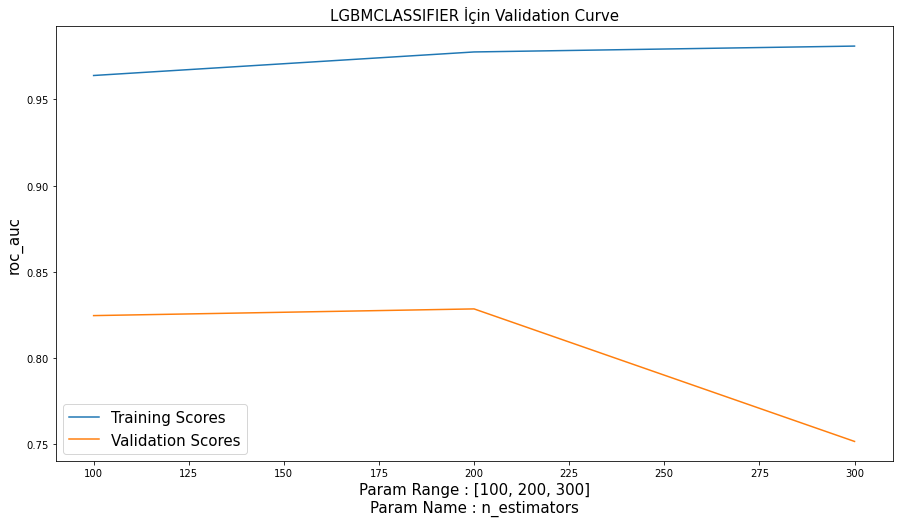

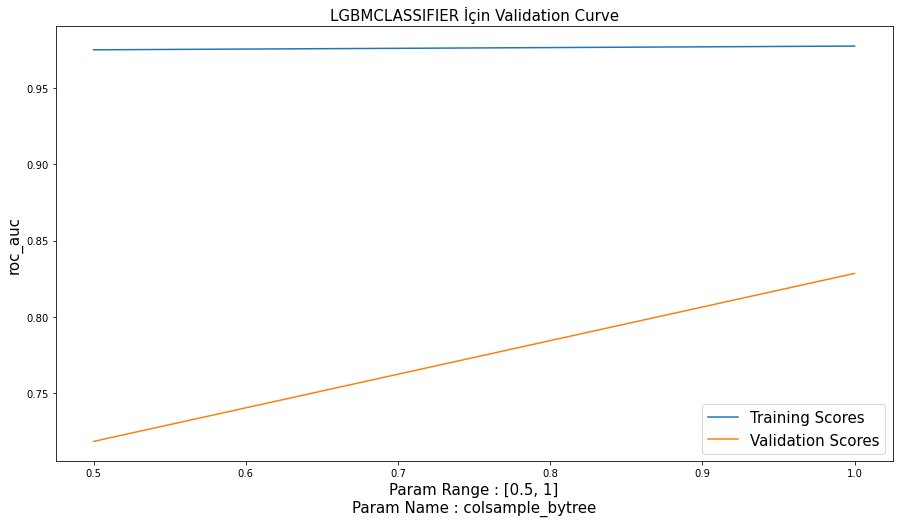

In [48]:
for cols in classifiers:
    
    name = cols[0]
    classifier = cols[1]
    params = cols[2]
    
    model = advanced_dict[name]
    
    # params dict içersinde fakat isimleri dönüyor ...
    
    for col in params:
        
        Validation_Curve(model = model,
                         X=X_Scaled,
                         y = y,
                         param_name=col,
                         param_range=params[col])        

In [49]:
# Burda Değerler birbiri ile eş zamanlı gerçekleşmiyor!!!
# Tek Tek olarak el alınıyor bunu göz önüne alalım 
# Hem GridSearchCV kullanarak ne kadar doğru bir seçim yapıldığına bakıyoruz
# Değerler Bizi Doğru olanları seçildiğini gösteriyor...

for cols in classifiers:
    
    name = cols[0]
    classifier = cols[1]
    params = cols[2]    
    
    print(f"{type(classifier).__name__.upper()} Params Değerleri\n")
     
    for col in params:
        
        print("{} : {}".format(col,advanced_dict[name].get_params()[col]))
        
    print("\n\n")

DECISIONTREECLASSIFIER Params Değerleri

max_depth : 10
min_samples_split : 15



LOGISTICREGRESSION Params Değerleri

C : 1.0
max_iter : 300



LGBMCLASSIFIER Params Değerleri

learning_rate : 0.2
n_estimators : 200
colsample_bytree : 1





## KFOLD - STRATIFIEDKFOLD

In [50]:
def kfold_models(model , X, y, n_splits = 5, kfold = True):
    """
    
    StratifiedKFold için kfold = False Yapın !!!
    
    """
    kfold_data = pd.DataFrame()
    kfold_index = 0
    kfold_list = []
    
    
    if kfold:
        
        print("KFold Using ....", end = "\n\n")
        print(f"KFold Splits = {n_splits}",end = "\n\n")
        fold_name = "KFold_"
        KFOLD = KFold(n_splits= n_splits , shuffle=True)
    
    else:
        
        print("StratifiedKFold Using .....", end= "\n\n")
        print(f"StratifiedKFold Splits = {n_splits}", end = "\n\n")
        fold_name = "StratifiedKFold_"
        KFOLD = StratifiedKFold(n_splits= n_splits ,shuffle=True)
        
        
    for n_fold, (train_idx,test_idx) in enumerate(KFOLD.split(X,y)):
        
        
        X_train,X_test = X.iloc[train_idx],X.iloc[test_idx] 
        y_train,y_test = y.iloc[train_idx],y.iloc[test_idx]
        
        model_fit = model.fit(X_train, y_train)
        
        
        y_pred = model_fit.predict(X_test)
        y_proba =  model_fit.predict_proba(X_test)[:,1]
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_proba)
        fpr,tpr,thresholds = roc_curve(y_test, y_proba)
        
        kfold_list.append( (n_fold,fpr,tpr,roc_auc) )
        
        kfold_data.loc[ kfold_index, fold_name +"NFOLD"] = n_fold + 1
        kfold_data.loc[ kfold_index, fold_name +"ROC_AUC_SCORE"] = round(roc_auc, 4)
        kfold_data.loc[ kfold_index, fold_name +"ACCURACY_SCORE"] = round(accuracy,4)
        
        kfold_index+=1
        
    kfold_data = kfold_data.set_index(fold_name + "NFOLD")
        
    print("Finish !!!! ")
        
        
    return kfold_list, kfold_data

In [51]:
def kfold_roc_auc_graph(roc_auc_values):
    
    mean_roc = []
    plt.figure(figsize = (15,8))
    
    for nfold,fpr,tpr,roc_scores in roc_auc_values:
        
        mean_roc.append(roc_scores)
        scores = round(roc_scores,4)
        plt.plot(fpr,tpr,
                 label = f"For K-Folds : {nfold+1}, ROC AUC (Area : {scores})")
    
    mean_roc_cal = np.mean(mean_roc)
    mean_roc_cal = round(mean_roc_cal, 4)
    plt.plot([0,1],[0,1],"black")
    plt.legend(loc = "best")
    plt.xlabel("False Positive Rate",fontsize = size)
    plt.ylabel("True Positive Rate",fontsize = size)
    plt.title(f"ROC AUC CURVE (AVERAGE AREA : {mean_roc_cal}))",fontsize = size)
    plt.show()    

In [52]:
kfold_list, kfold_data = kfold_models(model = advanced_dict["LightGBM"], 
                                      X = X_Scaled, 
                                      y = y, 
                                      n_splits=2 , 
                                      kfold = True)

KFold Using ....

KFold Splits = 2

Finish !!!! 


In [53]:
Stratified_kfold_list, Stratified_kfold_data = kfold_models(model = advanced_dict["LightGBM"], 
                                                            X = X_Scaled, 
                                                            y = y, 
                                                            n_splits=2 , 
                                                            kfold = False)

StratifiedKFold Using .....

StratifiedKFold Splits = 2

Finish !!!! 


In [54]:
kfold_data

,KFold_ROC_AUC_SCORE,KFold_ACCURACY_SCORE
KFold_NFOLD,,
1.0000,0.9293,0.9770
2.0000,0.9195,0.9740


In [55]:
Stratified_kfold_data

,StratifiedKFold_ROC_AUC_SCORE,StratifiedKFold_ACCURACY_SCORE
StratifiedKFold_NFOLD,,
1.0000,0.9250,0.9751
2.0000,0.9265,0.9776


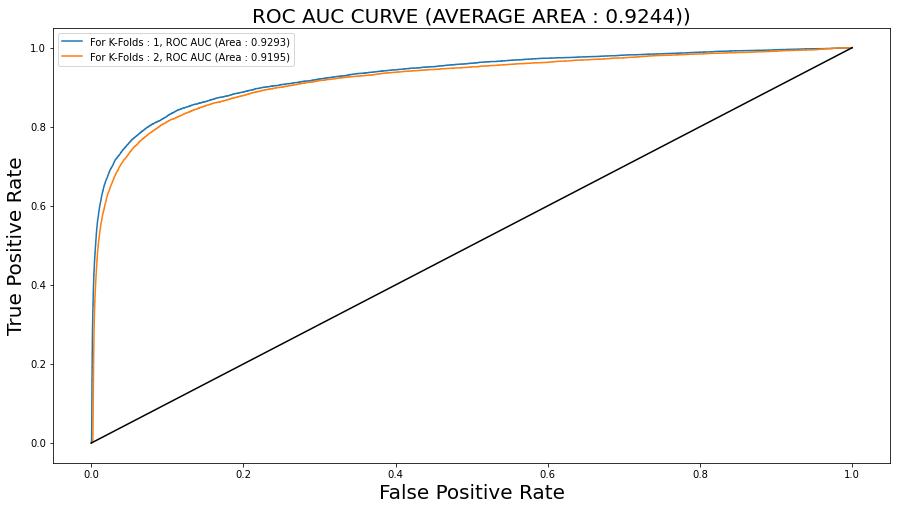

In [56]:
kfold_roc_auc_graph(kfold_list)

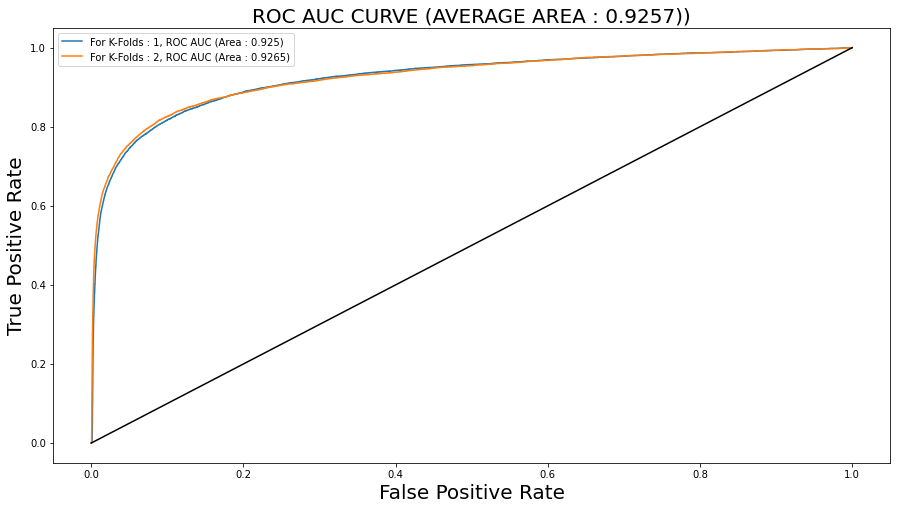

In [57]:
kfold_roc_auc_graph(Stratified_kfold_list)

##  Let's create our Forecast Data

In [58]:
submission_df = pd.DataFrame()
submission_df["TransactionID"] = test["TransactionID"]

In [59]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D11,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id-12,id-15,id-16,id-23,id-27,id-28,id-29,id-30,id-31,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo,days,day_risk,hours,hours_risk,LogTransactionAmt,Risk_TransactionAmt,Risk_ProductCD,card3_feature,addr1_risk,Dist1_Risk,Dist2_Risk,OS_id_30,Version_id_30,Browser_id_31,Version_id_31,Width_id_33,Height_id_33,DeviceCorp,Trans_min_mean,Trans_min_std,TransactionAmt_to_mean_card1,TransactionAmt_to_mean_card4,TransactionAmt_to_std_card1,TransactionAmt_to_std_card4,PCA_V_1,PCA_V_2,PCA_V_3
0,3663549,18403224,31.9500,4,10409,111.0000,150.0000,4,226.0000,2,170.0000,87.0000,1,4,6.0000,6.0000,0.0000,0.0000,3.0000,4.0000,0.0000,0.0000,6.0000,0.0000,5.0000,1.0000,115.0000,6.0000,419.0000,419.0000,27.0000,398.0000,418.0000,203.0000,409.0000,1,1,0,3,2,0,1,1,1,2,2,2,3,2,2,2,47,0,390,0,2,2,2,2,0,1986,7,0,1,0,3.4642,0,2,0,1,0,1,4,76,0,93,210,177,12,-102.7756,-0.4182,0.3393,0.2373,0.2604,0.1298,-6607.5614,-871.9692,-27.2619
1,3663550,18403263,49.0000,4,4272,111.0000,150.0000,4,226.0000,2,299.0000,87.0000,7,4,3.0000,2.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,2.0000,0.0000,1.0000,1.0000,12.0000,2.0000,149.0000,149.0000,7.0000,634.0000,231.0000,634.0000,634.0000,1,0,0,0,2,0,2,2,2,2,2,2,3,2,2,2,47,0,390,0,2,2,2,2,0,1986,7,0,1,0,3.8918,0,2,0,1,0,1,4,76,0,93,210,177,12,-85.7256,-0.3488,0.3335,0.3639,0.1343,0.1991,-6607.9515,-703.4290,76.4686
2,3663551,18403310,171.0000,4,4476,574.0000,150.0000,4,226.0000,2,472.0000,87.0000,2,4,2.0000,2.0000,0.0000,0.0000,0.0000,5.0000,0.0000,0.0000,4.0000,0.0000,2.0000,0.0000,22.0000,2.0000,137.0000,137.0000,10.0000,97.0000,136.0000,136.0000,97.0000,1,1,0,0,0,0,0,0,0,2,2,2,3,2,2,2,47,0,390,0,2,2,2,2,0,1986,7,0,1,0,5.1417,0,2,0,1,1,1,4,76,0,93,210,177,12,36.2744,0.1476,1.4855,1.2700,1.8958,0.6949,-6609.1210,-217.2663,405.5271
3,3663552,18403310,284.9500,4,10989,360.0000,150.0000,4,166.0000,2,205.0000,87.0000,1,4,5.0000,2.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,2.0000,0.0000,2.0000,0.0000,7.0000,4.0000,42.0000,42.0000,41.0000,242.0000,242.0000,242.0000,242.0000,1,1,1,3,2,1,2,2,2,2,2,2,3,2,2,2,47,0,390,0,2,2,2,2,0,1986,7,0,1,0,5.6523,1,2,0,1,0,1,4,76,0,93,210,177,12,150.2244,0.6112,2.9697,2.1163,1.9140,1.1579,-6607.5418,-899.4228,-42.3436
4,3663553,18403317,67.9500,4,18018,452.0000,150.0000,3,117.0000,2,264.0000,87.0000,1,4,6.0000,6.0000,0.0000,0.0000,2.0000,5.0000,0.0000,0.0000,5.0000,0.0000,6.0000,0.0000,14.0000,6.0000,22.0000,22.0000,0.0000,22.0000,22.0000,22.0000,22.0000,1,1,1,3,2,0,0,1,1,2,2,2,3,2,2,2,47,0,390,0,2,2,2,2,0,1986,7,0,1,0,4.2188,0,2,0,1,0,1,4,76,0,93,210,177,12,-66.7756,-0.2717,0.5674,0.5177,0.3102,0.2775,-6607.8473,-742.4405,50.8632


In [60]:
print("Test Shape : {}".format(test.shape))

Test Shape : (506691, 88)


In [61]:
test_cat_cols = ['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'id-12',
 'id-15',
 'id-16',
 'id-23',
 'id-27',
 'id-28',
 'id-29',
 'id-30',
 'id-31',
 'id-33',
 'id-34',
 'id-35',
 'id-36',
 'id-37',
 'id-38',
 'DeviceType',
 'DeviceInfo',
 'day_risk',
 'hours_risk',
 'Risk_TransactionAmt',
 'Risk_ProductCD',
 'card3_feature',
 'addr1_risk',
 'Dist1_Risk',
 'Dist2_Risk',
 'OS_id_30',
 'Version_id_30',
 'Browser_id_31',
 'Version_id_31',
 'Width_id_33',
 'Height_id_33',
 'DeviceCorp']

In [62]:
Test_Scaled = sc.transform(test[train_num_cols])
Test_Scaled = pd.DataFrame(data = Test_Scaled, columns = train_num_cols)

last_test = pd.concat([Test_Scaled,test[test_cat_cols]], axis = 1)

print("Test Shape : {}".format(last_test.shape))

Test Shape : (506691, 87)


In [63]:
submission_df["isFraud"] = advanced_dict["LightGBM"].predict_proba(last_test)[:,1]
submission_df.head()

,TransactionID,isFraud
0,3663549,0.0000
1,3663550,0.0002
2,3663551,0.0008
3,3663552,0.0001
4,3663553,0.0001


In [64]:
submission_df["isFraud"].value_counts()

0.0000    626
0.0407     22
0.0035     18
0.0062     17
0.0037     16
         ... 
0.0716      1
0.0001      1
0.0105      1
0.0259      1
0.0040      1
Name: isFraud, Length: 496297, dtype: int64

In [65]:
submission_df.to_csv("/Users/gokhanersoz/Desktop/GitHub/Fraud/submission_df.csv",index=False)

In [66]:
pd.read_csv("/Users/gokhanersoz/Desktop/GitHub/Fraud/submission_df.csv")

,TransactionID,isFraud
0,3663549,0.0000
1,3663550,0.0002
2,3663551,0.0008
3,3663552,0.0001
4,3663553,0.0001
...,...,...
506686,4170235,0.0397
506687,4170236,0.0615
506688,4170237,0.0090
506689,4170238,0.0148
